In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv("train_final.csv")
test = pd.read_csv("test_final.csv")

print(f"Test dataset shape: {test.shape}")

Test dataset shape: (23525, 28)


In [3]:
train['is_canceled'].value_counts()

0    31354
1    13284
Name: is_canceled, dtype: int64

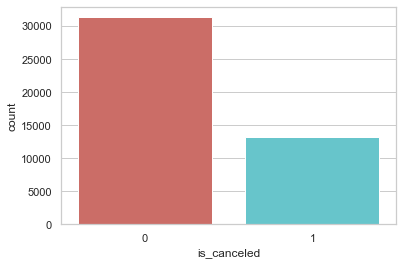

In [4]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(train['is_canceled'])
sns.countplot(x='is_canceled', data=y_data, palette='hls')
plt.show()

In [5]:
train['reserved_room_type'].unique()

array(['E', 'A', 'F', 'D', 'C', 'G', 'H', 'B', 'P'], dtype=object)

In [6]:
test['reserved_room_type'].unique()

array(['A', 'B', 'D', 'E', 'G', 'F', 'C', 'H', 'L'], dtype=object)

In [7]:
train = train.drop(columns=['reservation_status_date'])
test = test.drop(columns=['reservation_status_date'])

In [8]:
categ = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type']

for i in categ:
    print(i)
    print(set(test[i].unique()).difference(set(train[i].unique())))
    print('-'*15)

hotel
set()
---------------
arrival_date_month
set()
---------------
meal
set()
---------------
country
{'VGB', 'SYC', 'MYT', 'UMI', 'COM', 'BEN', 'GTM', 'GLP'}
---------------
market_segment
set()
---------------
distribution_channel
set()
---------------
reserved_room_type
{'L'}
---------------
assigned_room_type
{'L'}
---------------
deposit_type
set()
---------------
customer_type
set()
---------------


In [9]:
from sklearn import preprocessing

categ = ['arrival_date_month', 'customer_type', 'meal', 'distribution_channel']

# Encode Categorical Columns

for col in categ:

    # создание и обучение
    le = preprocessing.LabelEncoder()
    train[col] = le.fit_transform(train[col])

    # преобразование теста
    test[col] = le.transform(test[col])

train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,3,2016,3,7,12,0,2,2,...,0,E,F,0,No Deposit,0,2,81.0,1,0
1,City Hotel,1,50,2016,9,47,18,1,2,2,...,0,A,A,0,No Deposit,0,2,93.6,0,2
2,City Hotel,0,14,2015,11,37,7,1,5,2,...,0,F,F,0,No Deposit,0,0,166.0,0,3
3,City Hotel,0,18,2015,2,50,6,2,0,2,...,0,A,A,0,No Deposit,0,2,107.0,0,0
4,City Hotel,1,263,2016,11,40,29,2,4,2,...,0,A,A,0,No Deposit,0,2,100.3,0,0


In [10]:
cat_features = train.loc[:, train.dtypes == object].columns
cat_features

Index(['hotel', 'country', 'market_segment', 'reserved_room_type',
       'assigned_room_type', 'deposit_type'],
      dtype='object')

In [11]:
train = train.drop(columns=['country', 'assigned_room_type'])
test = test.drop(columns=['country', 'assigned_room_type'])

In [12]:
print(train['reserved_room_type'].value_counts())
print(test['reserved_room_type'].value_counts())

A    31897
D     7356
E     2488
F     1082
G      784
B      433
C      355
H      241
P        2
Name: reserved_room_type, dtype: int64
A    17435
D     3497
E     1121
F      539
G      423
B      206
C      174
H      129
L        1
Name: reserved_room_type, dtype: int64


In [13]:
train = train.drop(columns=['reserved_room_type'])
test = test.drop(columns=['reserved_room_type'])

In [14]:
# V2
train = pd.get_dummies(train, columns=['hotel', 'market_segment', 'deposit_type'])

train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,3,2016,3,7,12,0,2,2,0.0,...,0,0,0,1,0,0,0,1,0,0
1,1,50,2016,9,47,18,1,2,2,0.0,...,0,0,0,0,0,0,1,1,0,0
2,0,14,2015,11,37,7,1,5,2,2.0,...,0,0,0,0,0,0,1,1,0,0
3,0,18,2015,2,50,6,2,0,2,0.0,...,0,0,0,0,0,0,1,1,0,0
4,1,263,2016,11,40,29,2,4,2,0.0,...,0,0,0,0,0,0,1,1,0,0


In [15]:
train.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int32
distribution_channel                int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
customer_type                       int32
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
hotel_City Hotel                    uint8
hotel_Resort Hotel                

In [16]:
# V3
test = pd.get_dummies(test, columns=['hotel', 'market_segment', 'deposit_type'])

In [17]:
test.dtypes

lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int32
distribution_channel                int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
customer_type                       int32
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
hotel_City Hotel                    uint8
hotel_Resort Hotel                  uint8
market_segment_Aviation           

In [18]:
X = train.drop(columns=['is_canceled'])
y = train['is_canceled']

In [19]:
y.value_counts()

0    31354
1    13284
Name: is_canceled, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=10)

column = X.columns

print("До балансировки данных")
print(X.shape)
print(y.value_counts())

os_data_X, os_data_y = os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X, columns=column)
os_data_y = pd.DataFrame(data=os_data_y, columns=['is_canceled'])

print("После балансировки")
print(os_data_X.shape)
print(os_data_y.value_counts())

До балансировки данных
(44638, 33)
0    31354
1    13284
Name: is_canceled, dtype: int64
После балансировки
(62708, 33)
is_canceled
1              31354
0              31354
dtype: int64


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)

(43895, 33)
(18813, 33)


In [22]:
model = LogisticRegression()

model.fit(X_train, y_train)

answers_pred = model.predict(X_test)

C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, answers_pred)}')
print(f'Precision: {precision_score(y_test, answers_pred)}')
print(f'Recall: {recall_score(y_test, answers_pred)}')

Accuracy: 0.7252431829054378
Precision: 0.7380819470804957
Recall: 0.7007631969472122


In [24]:
y_pred_test = model.predict(test)

In [26]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['is_canceled'])
y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv("solution.csv", index=False)